<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/reactor_fed_batch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Reactor feed batch

Nombre: Biología de sistemas

Fecha: 9 de diciembre del 2020

Cargar librerías

In [19]:
install.packages("deSolve")
install.packages("ggplot2")
library(deSolve)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Establecer modelo

In [60]:
reactor <- function(time, state, parms) {
  with(as.list(c(state, parms)), {

    # Entradas
    q = parms[1]
    qf = parms[2]
    Caf = parms[3]
    Tf = parms[4]

    # Balances
    dV = qf - q
    dCa = (qf*Caf - q*Ca)/V - (Ca*(qf - q)/V)
    dTe = (qf*Tf - q*Te)/V - (Te*(qf - q)/V)

    return(list(c(dV, dCa, dTe)))
  })
}

Condiciones iniciales

In [61]:
V0 <- 1
Ca0 <- 0.0
Te0 <- 350
s <- c(V = V0, Ca = Ca0, Te = Te0)

Intervalo de integración

In [62]:
times <- seq(0,10,length.out = 100)
n <- length(times)

###Entradas del sistema 

Flujo en la entrada

In [63]:
qf <- rep(1,n)*5.2
qf[50:n] <- 5.1

Flujo en la salida

In [64]:
q <- rep(1,n)*5.0

Concentración en la entrada

In [65]:
Caf <- rep(1,n)*1.0
Caf[30:n] <- 0.5

Temperatura en la entrda

In [66]:
Tf <- rep(1,n)*300.0
Tf[70:n] <- 325

Vectores para guardar los resultados 

In [67]:
V <- rep(1,n)*V0
Ca <- rep(1,n)*Ca0
Te <- rep(1,n)*Te0

Iteraramos para cambiar el valor de las entradas las condiciones iniciales antes de cada simulación.

In [68]:
for (i in 1:(length(times)-1)) {
        
        u <- c(q[i], qf[i], Caf[i], Tf[i])
        
        ts <- c(times[i], times[i+1])
        
        out <- ode(y = s,times = ts,func = reactor,parms = u,method = "rk4")
        n <- nrow(out)
        
        V[i+1] <- out[n,2]
        Ca[i+1] <- out[n,3]
        Te[i+1] <- out[n,4]
        
        s <- out[n,-1]
}

Guardar los resultados 

In [70]:
data <- data.frame(q = q, qf = qf, Caf = Caf, Tf = Tf, V = V, Ca = Ca, Te = Te)

### Graficar resultados 

Flujos en la entrada y en la salida

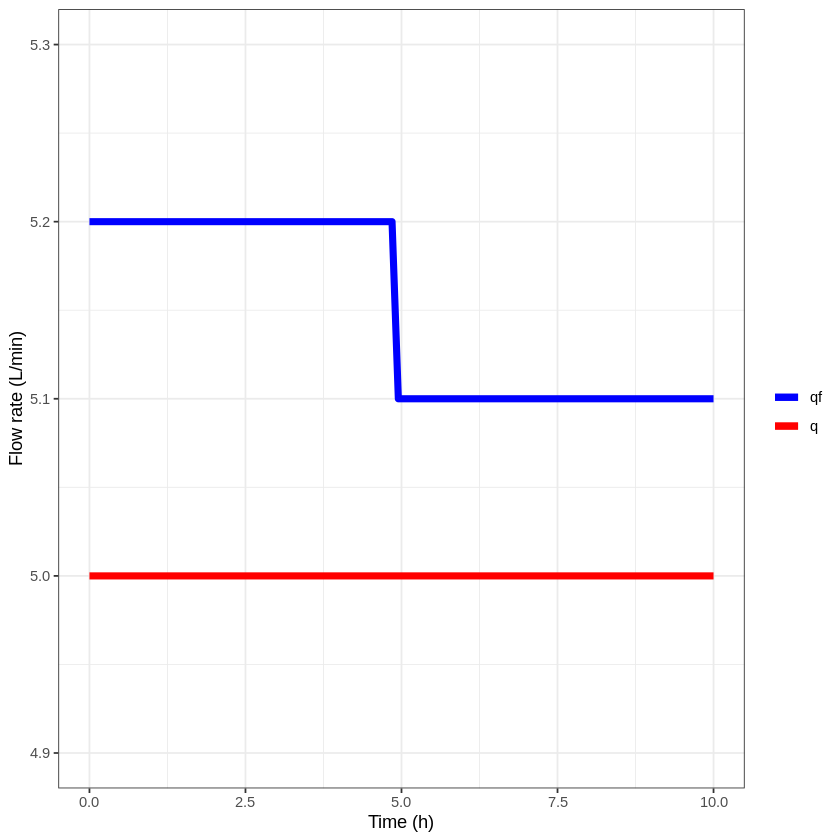

In [71]:
ggplot(data, aes(times)) +
  ylim(c(4.9,5.3)) +
  geom_line(aes(y = qf, color = "qf"), lwd = 2) +
  geom_line(aes(y = q, color = "q"), lwd = 2) +
  ylab("Flow rate (L/min)") +
  xlab("Time (h)") + 
  scale_colour_manual("", 
                        breaks = c("qf", "q"),
                        values = c("blue","red")) +
  theme_bw()

Concentración en la entrada

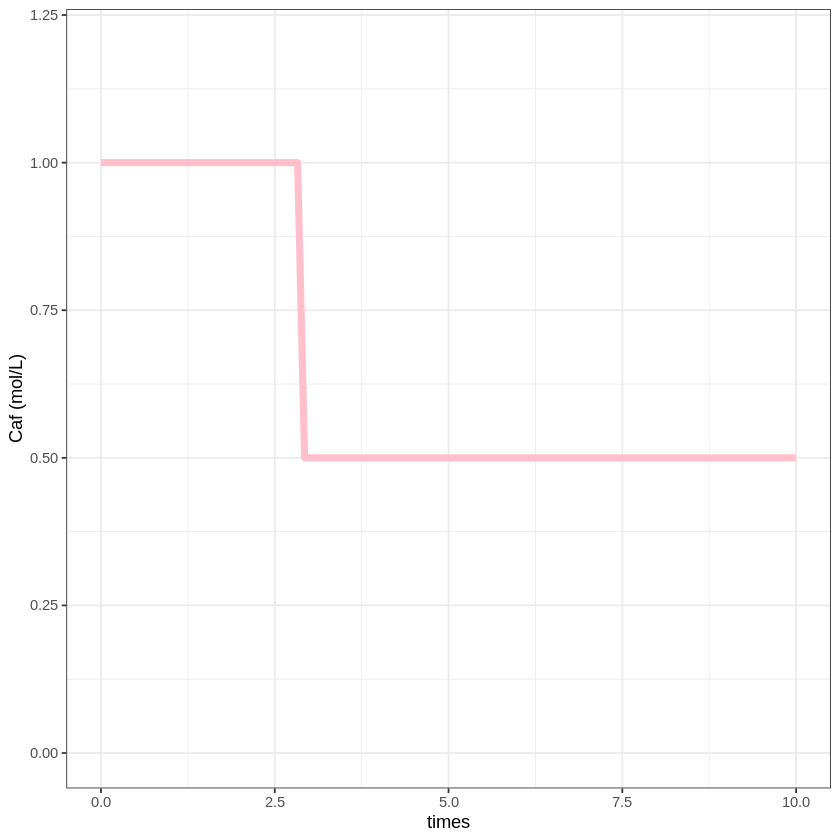

In [72]:
ggplot(data, aes(times)) +
      ylim(c(0,1.2)) +
      geom_line(aes(y = Caf), color = "pink", lwd = 2) +
      ylab("Caf (mol/L)") +
      theme_bw()

Temperatura en la entrada 

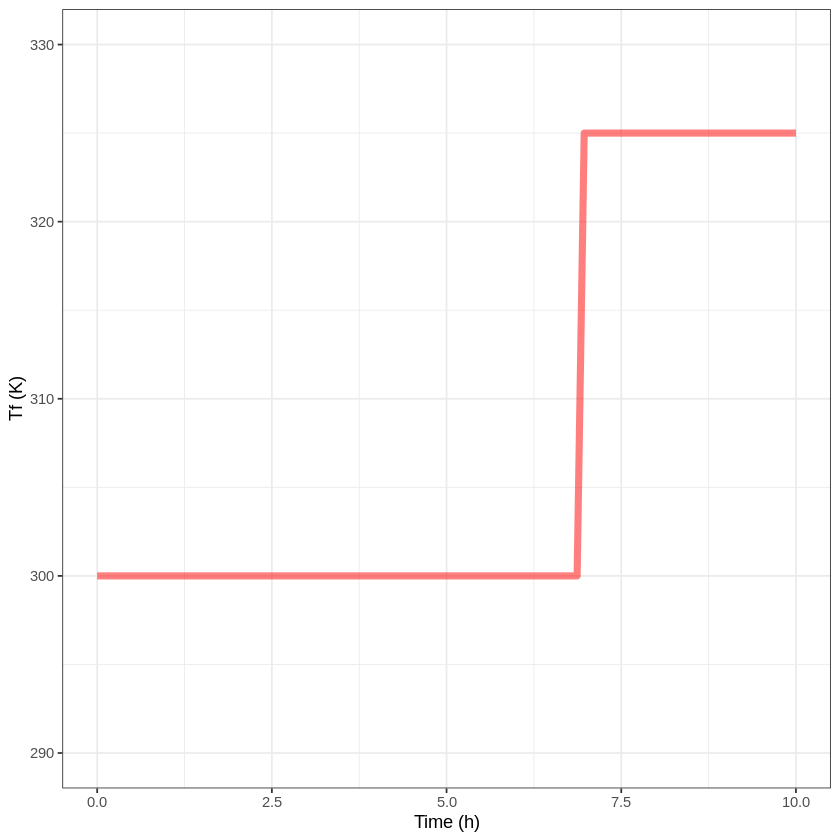

In [73]:
ggplot(data, aes(times)) +
      ylim(c(290,330)) +
      geom_line(aes(y = Tf), color = "red", lwd = 2, alpha = 0.5) +
      ylab("Tf (K)") +
      xlab("Time (h)") + 
      theme_bw()

Volumen en el reactor 

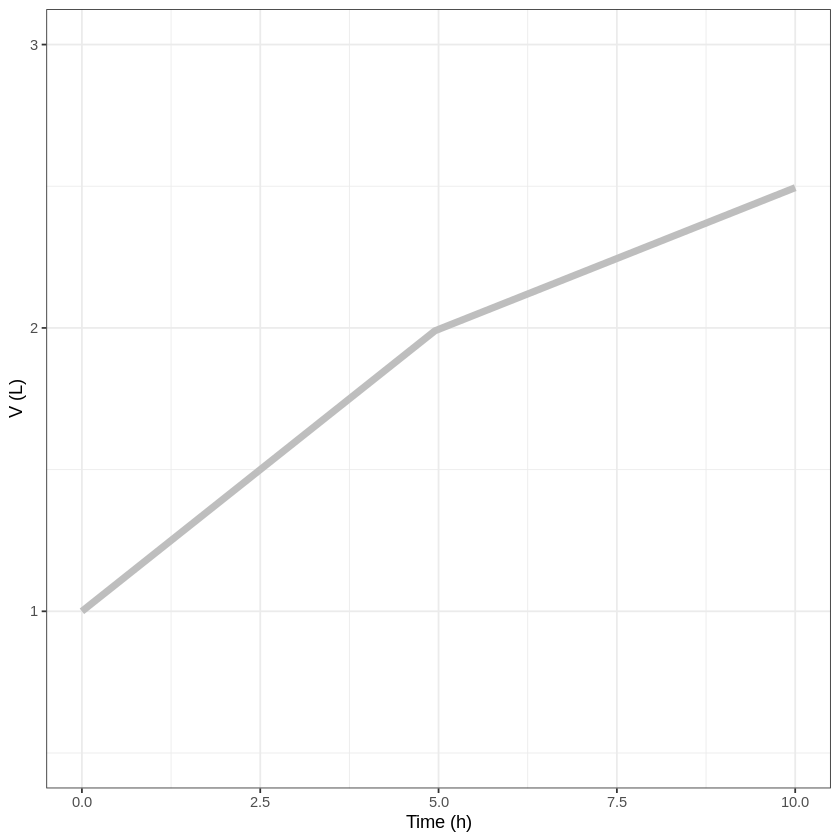

In [74]:
ggplot(data, aes(times)) +
      ylim(c(0.5,3)) +
      geom_line(aes(y = V), color = "gray", lwd = 2) +
      ylab("V (L)") +
      xlab("Time (h)") +
      theme_bw()

Concentración de $A$ en el reactor 

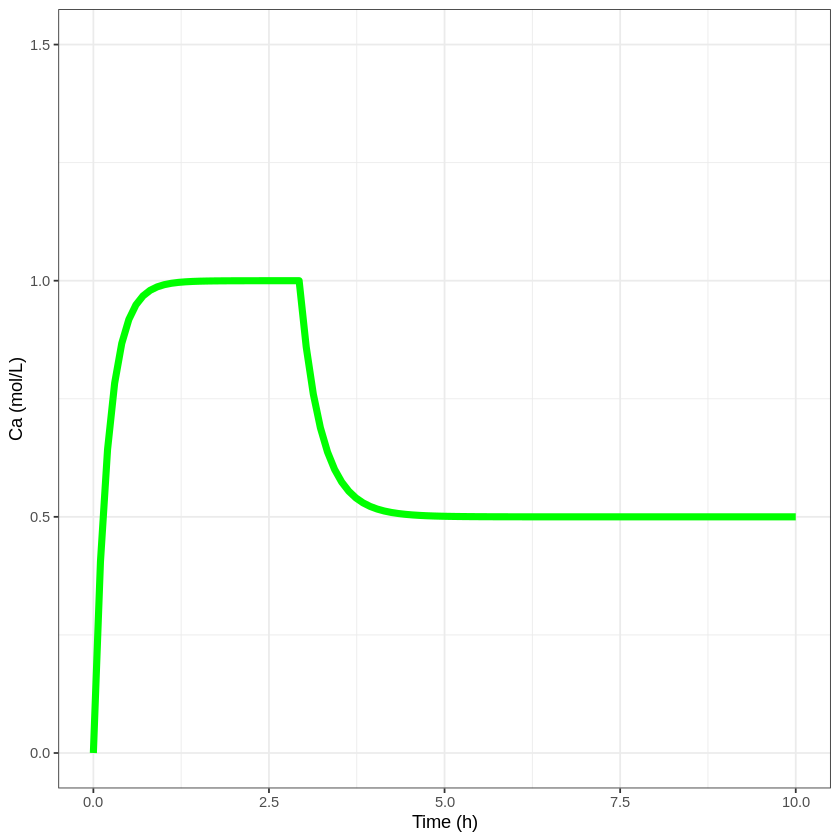

In [75]:
ggplot(data, aes(times)) +
      ylim(c(0,1.5)) +
      geom_line(aes(y = Ca), color = "green", lwd = 2) +
      ylab("Ca (mol/L)") +
      xlab("Time (h)") +
      theme_bw()

Temperatura en el reactor

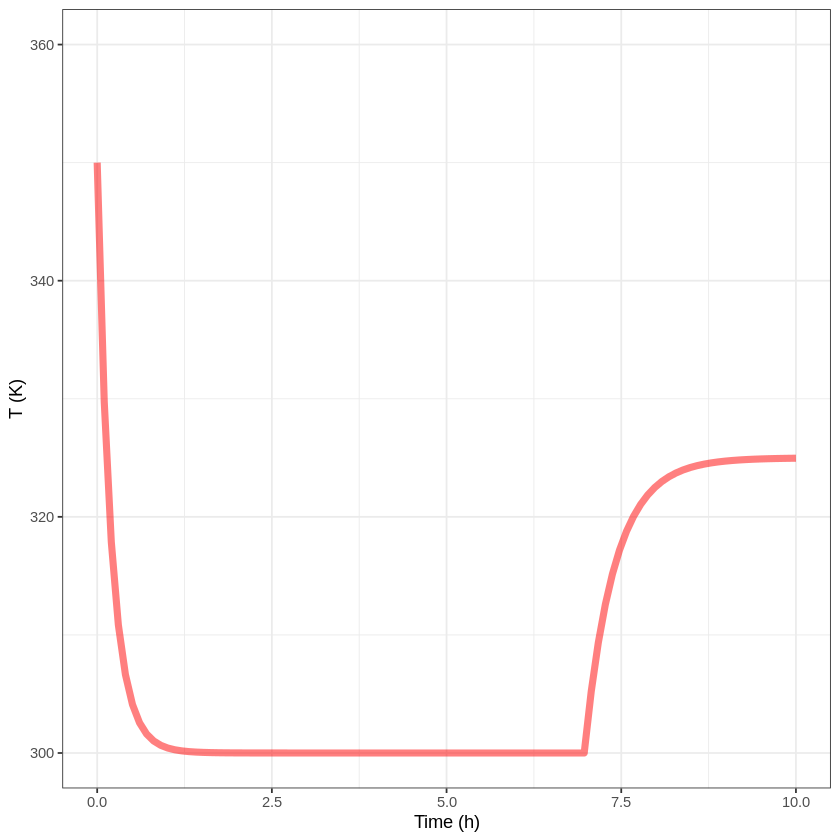

In [76]:
ggplot(data, aes(times)) +
      ylim(c(300,360)) +
      geom_line(aes(y = Te), color = "red", lwd = 2, alpha = 0.5) +
      ylab("T (K)") +
      xlab("Time (h)") +
      theme_bw()